Bacteria growth based Coloring - Chromatic number of the graph is: 3
Bacteria growth based Coloring - Time taken: 0.000169 seconds


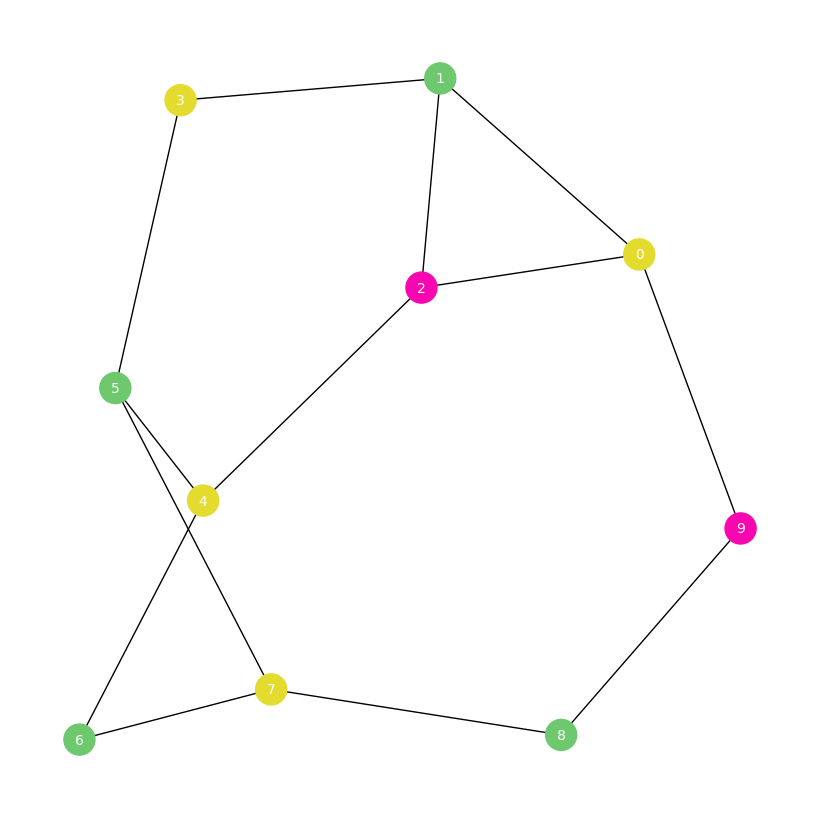

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.adjacency_matrix = [[0] * vertices for _ in range(vertices)]
        self.result = []

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1
        self.adjacency_matrix[v][u] = 1

    def is_safe(self, v, c, color):
        for i in range(self.vertices):
            if self.adjacency_matrix[v][i] == 1 and color[i] == c:
                return False
        return True

    def chromatic_number(self):
        result = [-1] * self.vertices

        def color_graph_util(v):
            if v == self.vertices:
                self.result = result[:]
                return True

            for c in range(1, self.vertices + 1):
                if self.is_safe(v, c, result):
                    result[v] = c
                    if color_graph_util(v + 1):
                        return True
                    result[v] = -1

        if not color_graph_util(0):
            return -1

        return max(self.result)

def visualize_graph(graph, coloring):
    G = nx.Graph()
    for i in range(graph.vertices):
        G.add_node(i)

    color_palette = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(graph.vertices)]

    color_map = [color_palette[color - 1] for color in coloring]

    for i in range(graph.vertices):
        for j in range(i + 1, graph.vertices):
            if graph.adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=color_map, font_size=10, font_color='white')
    plt.show()


graph = Graph(10)
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7), (7, 8), (8, 9), (9, 0)]

for edge in edges:
    graph.add_edge(edge[0], edge[1])

start_time = time.time()
chromatic_num = graph.chromatic_number()
end_time = time.time()
bacteria_growth_based_coloring_time = end_time - start_time

print(f"Bacteria growth based Coloring - Chromatic number of the graph is: {chromatic_num}")
print(f"Bacteria growth based Coloring - Time taken: {bacteria_growth_based_coloring_time:.6f} seconds")

visualize_graph(graph, [chromatic_num if c == -1 else c for c in graph.result])


Brute Force - Chromatic number of the graph is: 3
Bacteria growth based Coloring - Time taken: 0.001956 seconds


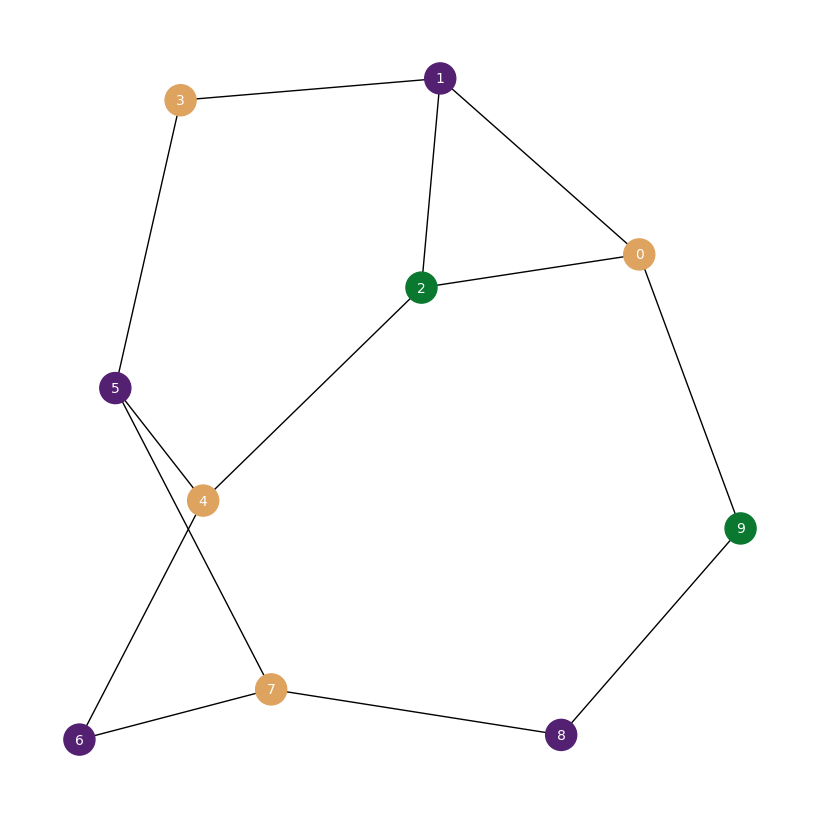

In [ ]:
def brute_force_chromatic_number(graph):
    chromatic_num = 1

    while True:
        coloring = [-1] * graph.vertices
        if brute_force_color_graph(0, coloring, chromatic_num, graph):
            return chromatic_num
        chromatic_num += 1

def brute_force_color_graph(v, coloring, chromatic_num, graph):
    if v == graph.vertices:
        return True

    for c in range(1, chromatic_num + 1):
        if graph.is_safe(v, c, coloring):
            coloring[v] = c
            if brute_force_color_graph(v + 1, coloring, chromatic_num, graph):
                return True
            coloring[v] = -1

    return False

start_time = time.time()
brute_force_chromatic_num = brute_force_chromatic_number(graph)
end_time = time.time()
brute_force_coloring_time = end_time - start_time
print(f"Brute Force - Chromatic number of the graph is: {brute_force_chromatic_num}")
print(f"Bacteria growth based Coloring - Time taken: {brute_force_coloring_time:.6f} seconds")

visualize_graph(graph, [chromatic_num if c == -1 else c for c in graph.result])
